In [ ]:
import keras

(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data(path="/content/mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# import numpy as np
# import pandas as pd

# X_train = np.reshape(X_train, (60000, 784))
# X_train = pd.DataFrame(X_train)
# print(X_train.iloc[345].value_counts())

In [ ]:
# # example of loading the mnist dataset
# import keras
# import numpy as np
# import pandas as pd 
# data=pd.read_csv("/content/mnist.npz")
# datat=pd.read_csv("https://raw.githubusercontent.com/sjwhitworth/golearn/master/examples/datasets/mnist_test.csv")
# X_train=data.iloc[:,1:785]
# y_train=data.iloc[:,0]
# yt=keras.utils.to_categorical(y_train,10)
# X_test=datat.iloc[:,1:785]
# y_test=datat.iloc[:,0]
# y_test_cat=keras.utils.to_categorical(y_test,10)


In [ ]:
import numpy as np
import pandas as pd 

#convert to dataframe and reshape to fit every image in one row
X_train = pd.DataFrame(X_train.reshape(60000, 784))
X_test = pd.DataFrame(X_test.reshape(10000, 784))

#converting datatype to 'int16' 
X_train = X_train.astype('int16')

# make y vectors one-hot vectors
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

#create mixed dataset of original and color-inverted images
X_train_mixed = X_train.copy()
for i in range(1, 60000, 2):
  X_train_mixed.values[i,:] = np.abs(X_train_mixed.values[i,:] - 255)

#create divided dataset of original and color-inverted images
X_train_divided = X_train.copy()
X_train_divided.values[:30000,:] = np.abs(X_train_mixed.values[:30000,:] - 255)

In [ ]:
from keras import Sequential
from keras.layers import Dense
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(32, activation='sigmoid', input_dim=784))
#Output Layer
classifier.add(Dense(10, activation='softmax'))
#Compiling the neural network
classifier.compile(optimizer ='sgd',loss='binary_crossentropy', metrics =['accuracy'])
history = []
history_mixed = []
history_divided = []
for i in range(1,11):
  history.append(classifier.fit(X_train,y_train, batch_size=10*i, epochs=20))
  history_mixed.append(classifier.fit(X_train_mixed,y_train, batch_size=10*i, epochs=20))
  history_divided.append(classifier.fit(X_train_divided,y_train, batch_size=10*i, epochs=20))

Epoch 1/20
6000/6000 [==============================] - 6s 979us/step - loss: 0.2612 - accuracy: 0.5623
Epoch 2/20
6000/6000 [==============================] - 6s 956us/step - loss: 0.1532 - accuracy: 0.7998
Epoch 3/20
6000/6000 [==============================] - 6s 962us/step - loss: 0.1050 - accuracy: 0.8636
Epoch 4/20
6000/6000 [==============================] - 6s 956us/step - loss: 0.0838 - accuracy: 0.8818
Epoch 5/20
6000/6000 [==============================] - 6s 956us/step - loss: 0.0742 - accuracy: 0.8900
Epoch 6/20
6000/6000 [==============================] - 6s 954us/step - loss: 0.0681 - accuracy: 0.8956
Epoch 7/20
6000/6000 [==============================] - 6s 967us/step - loss: 0.0641 - accuracy: 0.8997
Epoch 8/20
6000/6000 [==============================] - 6s 1ms/step - loss: 0.0612 - accuracy: 0.9023
Epoch 9/20
6000/6000 [==============================] - 7s 1ms/step - loss: 0.0583 - accuracy: 0.9056
Epoch 10/20
6000/6000 [==============================] - 6s 959us/st

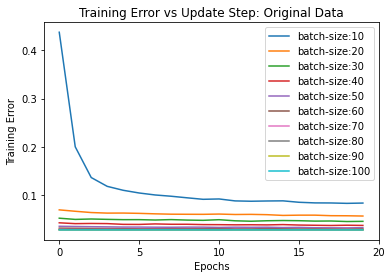

In [ ]:
import matplotlib.pyplot as plt
training_errors_og = [None]*10
for i in range(10):
  training_errors_og[i] = [1-x for x in history[i].history['accuracy']]
  plt.plot(training_errors_og[i], label='batch-size:'+ str(10*(i+1)))
  plt.ylabel('Training Error')

plt.xlabel('Epochs')
plt.xlim(right=20)
plt.xticks([0,5,10,15,20])
plt.legend()
plt.title('Training Error vs Update Step: Original Data')
plt.show()

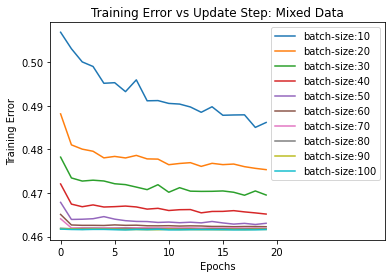

In [ ]:
import matplotlib.pyplot as plt

training_errors_mixed = [None]*10
for i in range(10):
  training_errors_mixed[i] = [1-x for x in history_mixed[i].history['accuracy']]
  plt.plot(training_errors_mixed[i], label='batch-size:'+ str(10*(i+1)))
  plt.ylabel('Training Error')


plt.xlabel('Epochs')
plt.xlim(right=30)
plt.xticks([0,5,10,15,20])
plt.legend()
plt.title('Training Error vs Update Step: Mixed Data')
plt.show()

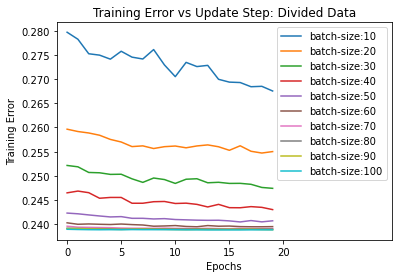

In [ ]:


import matplotlib.pyplot as plt
training_errors_divided = [None]*10
for i in range(10):
  training_errors_divided[i] = [1-x for x in history_divided[i].history['accuracy']]
  plt.plot(training_errors_divided[i], label='batch-size:'+ str(10*(i+1)))
  plt.ylabel('Training Error')

plt.xlabel('Epochs')
plt.xlim(right=30)
plt.xticks([0,5,10,15,20])
plt.legend(loc='upper right')
plt.title('Training Error vs Update Step: Divided Data')
plt.show()  

In [ ]:
# # Actual accuracy calculated manually:
# import numpy as np
# y_pred = classifier.predict(X_test)
# acc = sum([np.argmax(y_test_cat[i])==np.argmax(y_pred[i]) for i in range(500)])/500
# print(acc)

# # y_test=classifier.predict(X_test)
# # y_test1=np.argmax(y_test,axis=1)
# # count = np.size(y_test1)
# # id1=list(range(count+1))
# # id1=id1[1:count+1]
# # submission = pd.DataFrame({'ImageId':id1, 'Label': y_test1})
# # submission

In [ ]:
#code to convert image from one format to another

# from PIL import Image

# img = Image.open('/content/A_og.jpg')
# # img.show()
# converted = img.convert('P', palette='ADAPTIVE')
# converted

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# data.values[:, 1:] = np.abs(data.values[:, 1:] - 255)  # color inversion

# x=data.values[500, 1:]  # plot latest row in the dataset
# plt.imshow(x.reshape(28,28), cmap='gray')
# plt.show()